In [1]:
from rsplib import RSPEngine, RSPPublisher, Stream, rdf_table,load_graph, accessURL, Task, URIRef

In [2]:
jasper = RSPEngine("http://jasper:8181/jasper")

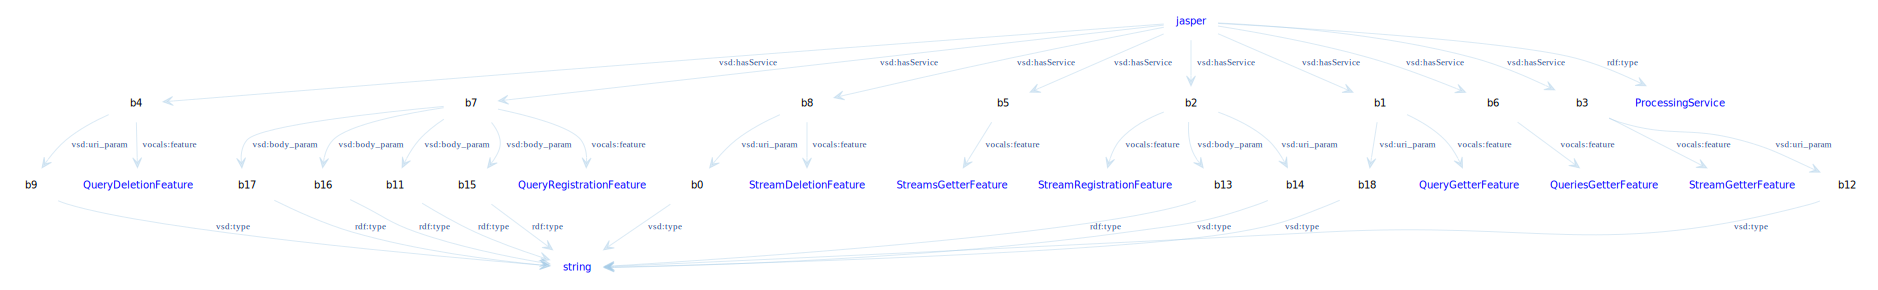

In [3]:
from rsplib.drawgraph import draw_graph
from IPython.display import display_html, Javascript, SVG, Image, display_svg,display_png
data, metadata = draw_graph(jasper.service().g, 'svg')
display_svg(data['image/svg+xml'], raw=True)

In [4]:
jasper.streams()

[]

In [5]:
jasper.tasks()

[]

In [6]:
qid  = "redcount"
tbox = "http://mynotebook:8888/files/colors.owl"
frmt = "JSON"
body ="""
        SELECT (COUNT(?r) as ?numRed)
        FROM NAMED WINDOW <rw> ON <http://redstream:1255/red> [RANGE PT15S STEP PT5S]
        WHERE {
                WINDOW ?rw { ?r a <http://www.streamreasoning.org/ontologies/2018/9/colors#Red> .}
            }
      """

In [7]:
redcount_query = jasper.create(qid, body, tbox, frmt)


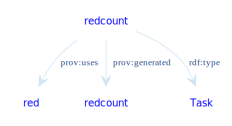

In [8]:
data, metadata = draw_graph(redcount_query.g, 'svg')
display_svg(data['image/svg+xml'], raw=True)

In [24]:
redcount_query.sources()

[GET http://redstream:1255/red]

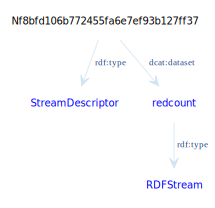

In [10]:
redcount_stream = redcount_query.stream()
data, metadata = draw_graph(redcount_stream.g, 'svg')
display_svg(data['image/svg+xml'], raw=True)


# The stream has no endpoint. 

In [23]:
redcount_stream.endpoints()

[]

In [18]:
# We need to expose it!

In [12]:
r = jasper.expose(qid, 'HTTP', retention=5)

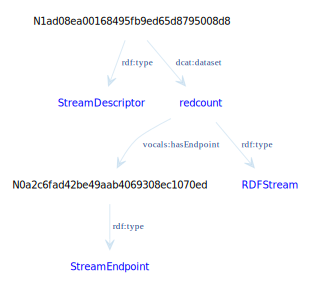

In [16]:
data, metadata = draw_graph(r.g, 'svg')
display_svg(data['image/svg+xml'], raw=True)

In [17]:
jasper.streams()

[http://redstream:1255/red, http://jasper:8181/jasper/streams/redcount]

In [27]:
endpoints = r.endpoints()

In [28]:
endpoints

[GET http://jasper:8182/jasper/streams/redcount/observers/1499675267]

In [29]:
endpoint = endpoints[0]

In [34]:
resp = endpoint.call()
resp

In [35]:
df = resp.flatten().dataframe(['results_bindings_0_numRed_value'])

In [36]:
df

,head_vars_0,results_bindings_0_numRed_datatype,results_bindings_0_numRed_type,results_bindings_0_numRed_value
0,numRed,http://www.w3.org/2001/XMLSchema#integer,literal,5
1,numRed,http://www.w3.org/2001/XMLSchema#integer,literal,6
2,numRed,http://www.w3.org/2001/XMLSchema#integer,literal,5
3,numRed,http://www.w3.org/2001/XMLSchema#integer,literal,4
4,numRed,http://www.w3.org/2001/XMLSchema#integer,literal,4


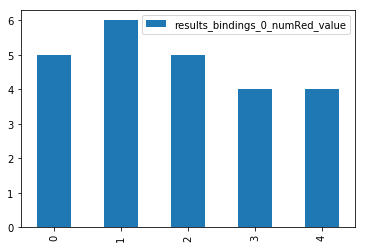

In [37]:
% matplotlib inline
df.plot(kind='bar')

In [28]:
jasper.delete(qid)